In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ["figure.figsize"] = 10,6 

In [2]:
import pandas as pd 
dataparse = lambda dates: pd.datetime.strptime(dates, "%m/&d/%y")
data=pd.read_csv("GoogleStock Price Updated.csv", header=0)
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2013/01/02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1,2013/01/03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2,2013/01/04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,3,2013/01/07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,4,2013/01/08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2536 non-null   int64  
 1   Date        2536 non-null   object 
 2   Open        2536 non-null   float64
 3   High        2536 non-null   float64
 4   Low         2536 non-null   float64
 5   Close       2536 non-null   float64
 6   Adj Close   2536 non-null   float64
 7   Volume      2536 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 158.6+ KB


In [4]:
data.index

RangeIndex(start=0, stop=2536, step=1)

In [5]:
reducedData =data.iloc[:,[2,5]]

In [6]:
reducedData["AveragePrice"] = (reducedData["Open"] + reducedData["Close"]) / 2;

/var/folders/_k/_h4vm2qn2cqgtgmmlj65k5vc0000gn/T/ipykernel_13091/2946059789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducedData["AveragePrice"] = (reducedData["Open"] + reducedData["Close"]) / 2;


In [7]:
reducedData.head()

,Open,Close,AveragePrice
0,18.003504,18.099348,18.051426
1,18.141392,18.109859,18.125626
2,18.251753,18.467718,18.359735
3,18.404655,18.387136,18.395896
4,18.406906,18.350851,18.378879


In [8]:
myPrice = reducedData.loc[:, "AveragePrice"]
myPrice.head()

0    18.051426
1    18.125626
2    18.359735
3    18.395896
4    18.378879
Name: AveragePrice, dtype: float64

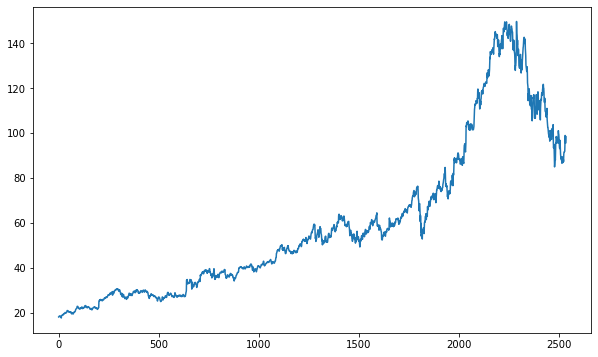

In [9]:
plt.plot(myPrice)

# Components of a TimeSeries

/var/folders/_k/_h4vm2qn2cqgtgmmlj65k5vc0000gn/T/ipykernel_13091/158916145.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(myPrice, freq = 3)


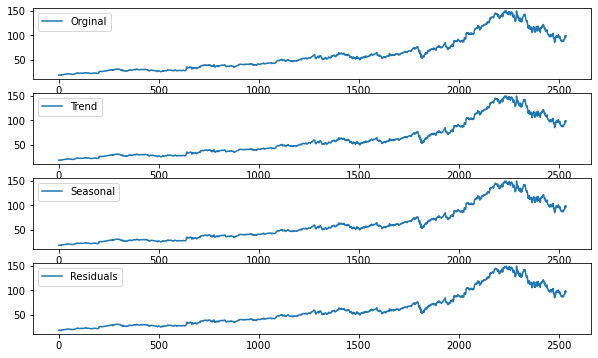

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(myPrice, freq = 3)


trend = decomposition.trend 
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(myPrice, label="Orginal")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(myPrice, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(myPrice, label="Seasonal")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(myPrice, label="Residuals")
plt.legend(loc="best")



# Normality Test 

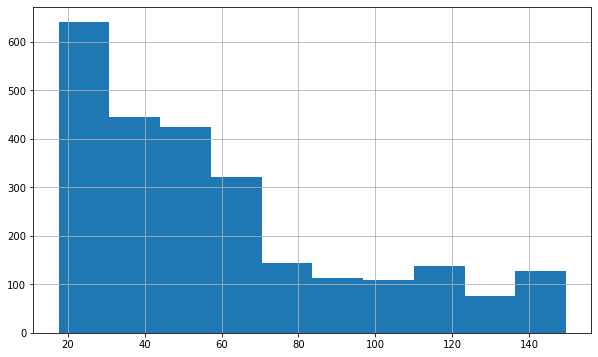

In [11]:
from pandas import Series
from matplotlib import pyplot
myPrice.hist()
pyplot.show()

/Users/batuhansaglam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


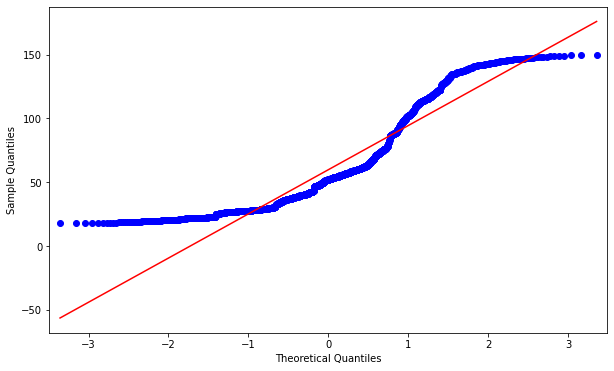

In [12]:
# q-q plot 
from statsmodels.graphics.gofplots import qqplot
qqplot(myPrice, line= "s")
pyplot.show()

# Shapiro Test

In [13]:
from scipy.stats import shapiro

In [14]:
def shapiroTest(ts):
    val = shapiro(ts)
    statistic = round(val[0],3)
    pval = round(val[1],3)
    criticalVal = 0.05
    if pval > criticalVal:
        print("a Gaussian Case")
    else:
        print("a non Gaussian Case")
    
    

In [15]:
shapiroTest(myPrice)

a non Gaussian Case


# Stationarity 

In [16]:
#  let us the investigate if the mean and varianne of the series change through the time 
def rolling_Mean_STD(timeseries):
    
    rolmean = timeseries.rolling(window= 12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color ="blue", label="Orginal")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="black", label="Rolling std")
    plt.legend(loc="best")
    plt.title("rolling mean and rolling std")
    plt.show(block=False)


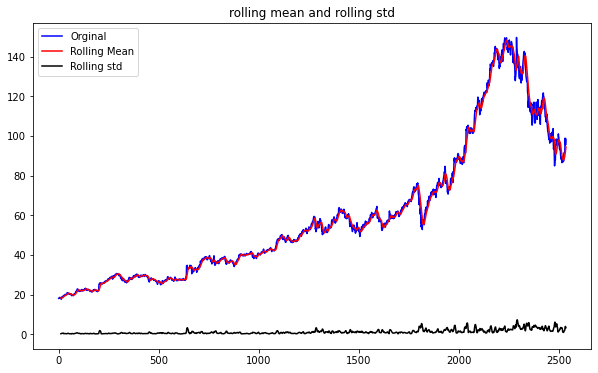

In [17]:
rolling_Mean_STD(myPrice)

In [18]:
ts=myPrice

In [19]:
ts.loc[:"AveragePrice"]

0       18.051426
1       18.125626
2       18.359735
3       18.395896
4       18.378879
          ...    
2531    98.869999
2532    97.899998
2533    95.395000
2534    97.009998
2535    98.340000
Name: AveragePrice, Length: 2536, dtype: float64

In [20]:
def mean_checker(timeSeries):
    thres = int(len[timeSeries]/3)
    firstPart = timeSeries
    

In [21]:
def mean_checker (timeSeries):
    thres = int(len(timeSeries)/3)
    firstPart = timeSeries[1: thres]
    secondPart = timeSeries[ (thres+1) : (2*thres)]
    thirdPart = timeSeries[(2*thres+1):]
    
    print ('the length of the first part is',len(firstPart))
    print("the length of the second part is", len(secondPart))
    print('the length of the third part is',len(thirdPart))
    print("------------------------------------------")
    firstMean= firstPart.mean()
    secondMean = secondPart.mean()
    thirdMean = thirdPart.mean()
    print("------------------------------------------")
    print( "The mean of the first part is",firstMean)
    print ( "The mean of the second part is", secondMean)
    print( 'The mean of the third part is',thirdMean)

In [22]:
mean_checker(ts)

the length of the first part is 844
the length of the second part is 844
the length of the third part is 845
------------------------------------------
------------------------------------------
The mean of the first part is 28.230028422522885
The mean of the second part is 50.41302725715095
The mean of the third part is 100.63146240640674


In [23]:
# let us the use the duckey fuller test
from statsmodels.tsa.stattools import adfuller 
def stationarity_test(timeseries):
    
    
    print("result of the duckey fuller test:")
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p- value",
                                            "#lag used",
                                            "number of observation used"])
    for key,value in dftest[4].items():
        dfoutput["Critical value (%s)" %key] = value 
    print (dfoutput)
    
    
    

In [24]:
stationarity_test(myPrice)

result of the duckey fuller test:
Test Statistic                  -0.811282
p- value                         0.815786
#lag used                       24.000000
number of observation used    2511.000000
Critical value (1%)             -3.432957
Critical value (5%)             -2.862692
Critical value (10%)            -2.567383
dtype: float64


# Make the series Stationary

# Log transformations

In [25]:
logTs = np.log(ts)

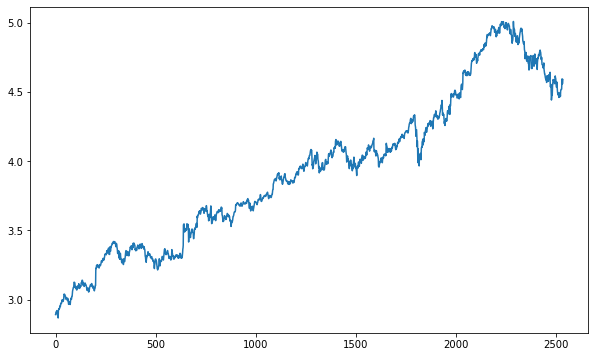

In [26]:
plt.plot(logTs)

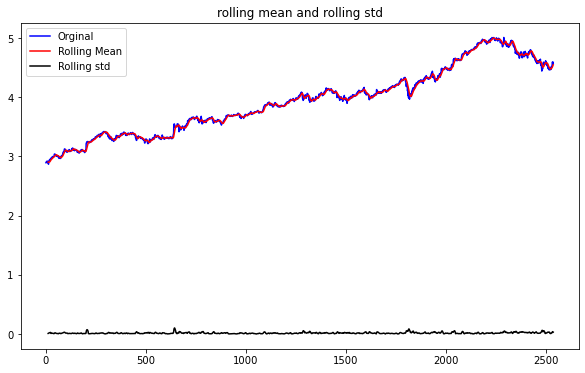

In [27]:
rolling_Mean_STD(logTs)

In [28]:
mean_checker(logTs)

the length of the first part is 844
the length of the second part is 844
the length of the third part is 845
------------------------------------------
------------------------------------------
The mean of the first part is 3.321717603884788
The mean of the second part is 3.907725624450565
The mean of the third part is 4.572745925925543


In [29]:
stationarity_test(logTs)

result of the duckey fuller test:
Test Statistic                  -1.477475
p- value                         0.544623
#lag used                        9.000000
number of observation used    2526.000000
Critical value (1%)             -3.432941
Critical value (5%)             -2.862685
Critical value (10%)            -2.567379
dtype: float64


# Differencing 

In [30]:
differencedSeries = ts -ts.shift()
differencedSeries

0            NaN
1       0.074200
2       0.234110
3       0.036160
4      -0.017017
          ...   
2531    2.310001
2532   -0.970001
2533   -2.504997
2534    1.614998
2535    1.330002
Name: AveragePrice, Length: 2536, dtype: float64

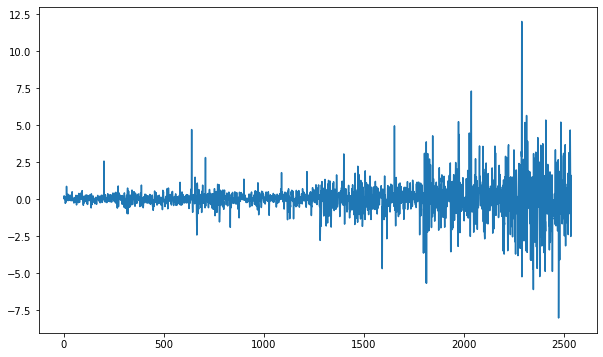

In [31]:
differencedSeries.dropna(inplace = True)
plt.plot(differencedSeries)

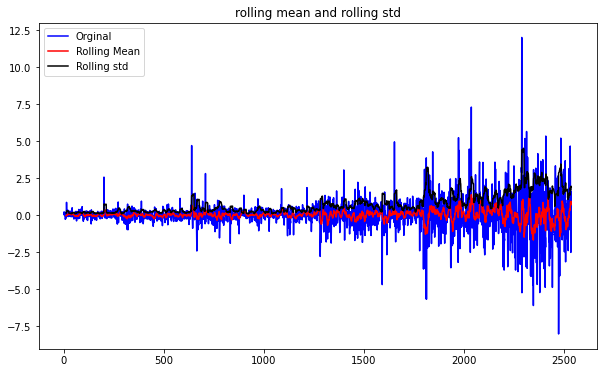

In [32]:
rolling_Mean_STD(differencedSeries)

In [33]:
mean_checker(differencedSeries)

the length of the first part is 844
the length of the second part is 844
the length of the third part is 844
------------------------------------------
------------------------------------------
The mean of the first part is 0.02209848928225549
The mean of the second part is 0.029946684272368372
The mean of the third part is 0.04354620883815098


In [34]:
stationarity_test(differencedSeries)

result of the duckey fuller test:
Test Statistic               -1.088292e+01
p- value                      1.281213e-19
#lag used                     2.300000e+01
number of observation used    2.511000e+03
Critical value (1%)          -3.432957e+00
Critical value (5%)          -2.862692e+00
Critical value (10%)         -2.567383e+00
dtype: float64


# Time Series Forecasting 

# ARIMA BENCHMARK MODEL IN THE TIME SERIES

# AUTO CORRELATION FUNCTION ACF

In [40]:
from statsmodels.tsa.stattools import acf, pacf


/Users/batuhansaglam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

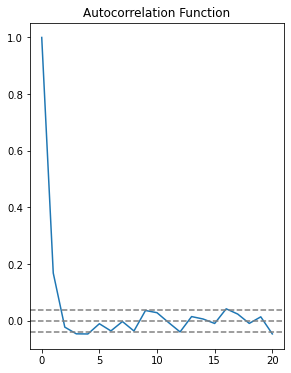

In [41]:
acValues = acf(differencedSeries, nlags=20)

plt.subplot(121)
plt.plot(acValues)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle="--", color='gray')
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle="--", color='gray')
plt.title('Autocorrelation Function')

# Introduction to Partial autocrrelation function(PACF)

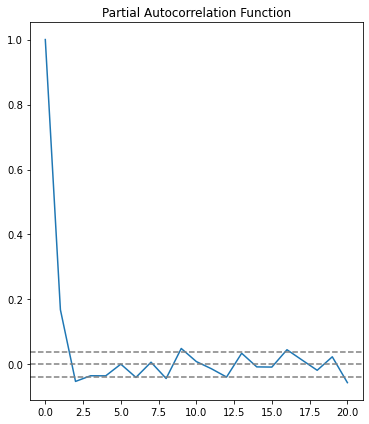

In [42]:
pacValues = pacf(differencedSeries, nlags=20, method='ols')
plt.subplot(122)
plt.plot (pacValues)
plt.axhline (y=0, linestyle="--",color='gray')
plt.axhline(y=-1.96/np.sqrt(len(differencedSeries)),linestyle="--", color= "gray")
plt.axhline(y=1.96/np.sqrt(len(differencedSeries)),linestyle="--", color="gray")

plt.title( 'Partial Autocorrelation Function')
plt.tight_layout()

In [43]:
#This function takes three lists and create a bigger list that will contain all the
# possible three combinations we can create from those three lists.
def comb_p_d_q(pVals,dVals,qVals):
    return [(p,d,q) for p in pVals for d in dVals for q in qVals]


In [44]:
comb_p_d_q([0,1,2],[0,1,2],[0,1,2])

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
def aic_finder(ts, model_order):
    model = ARIMA(ts, order= model_order)
    model_fit = model.fit(disp=0)
    aicval = model_fit.aic
    if np.isfinite(aicval):
        return aicval
    else:
        return 9999

In [47]:
aic_finder(myPrice.values,(2,0,1))


/Users/batuhansaglam/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


7407.004925667762

In [48]:
def bestModel(timeseries, pVals, dVals, qVals):
    # Generate combinations of p, d, and q values
    all_models = comb_p_d_q(pVals, dVals, qVals)

    l = len(timeseries)
    trainSize = int(l * 0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[trainSize+1:]
    aicVals = []
    
    for elem in all_models:
        mm = aic_finder(trainSet, elem)  # You need to define aic_finder function
        aicVals.append(mm)
    
    print('The list of AIC is:', aicVals)
    print("")
    minVals = min(aicVals)
    print('The smallest AIC value is:', minVals)
    locMin = aicVals.index(minVals)
    print('The location of the smallest value of AICVals is', locMin)
    print("The corresponding model is:", all_models[locMin])  # Corrected the typo

# Example usage:
# bestModel(your_timeseries_data, pVals, dVals, qVals)


In [49]:
bestModel(myPrice.values, [1,2], [1,2],[1,2])

                           
                                  
                                    

The list of AIC is: [3632.3642310470846, 3634.263047043695, 3638.8210395668825, 3626.9963408205676, 3634.2938845995523, 3635.077198038609, 3640.3267814167625, 3626.7282656384978]

The smallest AIC value is: 3626.7282656384978
The location of the smallest value of AICVals is 7
The corresponding model is: (2, 2, 2)


In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

def prediction(timeseries, order):
    # Split the time series into train and test sets
    l = len(timeseries)
    trainSize = int(l * 0.75)
    trainSet = timeseries[0:trainSize]
    testSet = timeseries[trainSize:]

    print('The length of the train set is', len(trainSet))
    print('The length of the test set is', len(testSet))

    trainSet = list(trainSet)
    predictedValues = []

    for i in range(len(testSet)):
        model = ARIMA(trainSet, order=order)
        model_fit = model.fit()
        forecasted_value = model_fit.forecast(steps=1)[0]
        predictedValues.append(forecasted_value)
        trainSet.append(forecasted_value)

    print('The predicted values are:')
    print(predictedValues)

    # Calculate mean squared error
    error = mean_squared_error(testSet, predictedValues)
    print('The forecast error is:', error)

    return predictedValues

# Usage example:
# Replace 'your_timeseries_data' and 'your_order' with your own data and order values
# For example, you can call it like this:
# prediction(your_timeseries_data, your_order)

# Generate some example data (replace this with your actual time series data)
np.random.seed(0)
myPrice = np.random.randn(100)

# Define your order (p, d, q)
order = (1, 1, 1)

# Call the prediction function
testVal = prediction(myPrice, order)

# Print the predicted values
print(testVal)


The length of the train set is 75
The length of the test set is 25
The predicted values are:
[-0.20361112558000283, -0.18595892782463103, -0.18662833548817767, -0.186740342228461, -0.18685244869890222, -0.1869612020881898, -0.1870391171624529, -0.18711649304120676, -0.18718443310074886, -0.18724529350324026, -0.18729766979695128, -0.18734580739815335, -0.18738785858192267, -0.18742489123492156, -0.18745812077383725, -0.18748769967732057, -0.18751396632762252, -0.18753722397453274, -0.18755803161238715, -0.18757654437861496, -0.18759302082670054, -0.1876077301996602, -0.18762090522483774, -0.18763259085099498, -0.1876430709934439]
The forecast error is: 1.0269516671669294
[-0.20361112558000283, -0.18595892782463103, -0.18662833548817767, -0.186740342228461, -0.18685244869890222, -0.1869612020881898, -0.1870391171624529, -0.18711649304120676, -0.18718443310074886, -0.18724529350324026, -0.18729766979695128, -0.18734580739815335, -0.18738785858192267, -0.18742489123492156, -0.187458120773